# FINAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/Shareddrives/TFG/Final TFG dataset')

#Reading the different datasets
#March 19th
avg_rt_df_1 = pd.read_csv('avg_rt_tde_190323_21_23.csv', skiprows=1)
connections_df_1 = pd.read_csv('connections_tde_190323_21_23.csv', skiprows=1)
cpu_df_1 = pd.read_csv('cpu_tde_190323_21_23.csv', skiprows=1)
disk_iops_df_1 = pd.read_csv('disk_iops_tde_190323_21_23.csv', skiprows=1)
disk_time_df_1 = pd.read_csv('disk_time_tde_190323_21_23.csv', skiprows=1)
disk_throughput_df_1 = pd.read_csv('disk_troughput_tde_190323_21_23.csv', skiprows=1)
disk_use_df_1 = pd.read_csv('disk_use_tde_190323_21_23.csv', skiprows=1)
#hw_df = pd.read_csv('hw_tde.csv', skiprows=1)
network_df_1 = pd.read_csv('network_tde_190323_21_23.csv', skiprows=1)
total_request_df_1 = pd.read_csv('total_request_tde_190323_21_23.csv', skiprows=1)
avg_bitrate_df_1 = pd.read_csv('avg_bitrate_tde_190323_21_23.csv', skiprows=1)
saturations_df_1 = pd.read_csv('saturations_tde_190323_21_23.csv', skiprows=1)
capacity_df_1 = pd.read_csv('capacidades_tde_190323_21_23.csv', skiprows=1)

#May 9th
avg_rt_df_2 = pd.read_csv('avg_rt_tde_090523_21_23.csv')
connections_df_2 = pd.read_csv('connections_tde_090523_21_23.csv')
cpu_df_2 = pd.read_csv('cpu_tde_090523_21_23.csv')
disk_iops_df_2 = pd.read_csv('disk_iops_tde_090523_21_23.csv')
disk_time_df_2 = pd.read_csv('disk_time_tde_090523_21_23.csv')
disk_throughput_df_2 = pd.read_csv('disk_troughput_tde_090523_21_23.csv')
disk_use_df_2 = pd.read_csv('disk_use_tde_090523_21_23.csv')
#hw_df = pd.read_csv('hw_tde.csv', skiprows=1)
network_df_2 = pd.read_csv('network_tde_090523_21_23.csv')
total_request_df_2 = pd.read_csv('total_request_tde_090523_21_23.csv')
avg_bitrate_df_2 = pd.read_csv('avg_bitrate_tde_090523_21_23.csv')
saturations_df_2 = pd.read_csv('saturations_tde_090523_21_23.csv')
capacity_df_2 = pd.read_csv('capacidades_tde_090523_21_23.csv')

#May 17th
avg_rt_df_3 = pd.read_csv('avg_rt_tde_170523_21_23.csv')
connections_df_3 = pd.read_csv('connections_tde_170523_21_23.csv')
cpu_df_3 = pd.read_csv('cpu_tde_170523_21_23.csv')
disk_iops_df_3 = pd.read_csv('disk_iops_tde_170523_21_23.csv')
disk_time_df_3 = pd.read_csv('disk_time_tde_170523_21_23.csv')
disk_throughput_df_3 = pd.read_csv('disk_troughput_tde_170523_21_23.csv')
disk_use_df_3 = pd.read_csv('disk_use_tde_170523_21_23.csv')
#hw_df = pd.read_csv('hw_tde.csv', skiprows=1)
network_df_3 = pd.read_csv('network_tde_170523_21_23.csv')
total_request_df_3 = pd.read_csv('total_request_tde_170523_21_23.csv')
avg_bitrate_df_3 = pd.read_csv('avg_bitrate_tde_170523_21_23.csv')
saturations_df_3 = pd.read_csv('saturations_tde_170523_21_23.csv')
capacity_df_3 = pd.read_csv('capacidades_tde_170523_21_23.csv')

#May 31st
avg_rt_df_4 = pd.read_csv('avg_rt_tde_310523_21_00.csv')
connections_df_4 = pd.read_csv('connections_tde_310523_21_00.csv')
cpu_df_4 = pd.read_csv('cpu_tde_310523_21_00.csv')
disk_iops_df_4 = pd.read_csv('disk_iops_tde_310523_21_00.csv')
disk_time_df_4 = pd.read_csv('disk_time_tde_310523_21_00.csv')
disk_throughput_df_4 = pd.read_csv('disk_troughput_tde_310523_21_00.csv')
disk_use_df_4 = pd.read_csv('disk_use_tde_310523_21_00.csv')
#hw_df = pd.read_csv('hw_tde.csv', skiprows=1)
network_df_4 = pd.read_csv('network_tde_310523_21_00.csv')
total_request_df_4 = pd.read_csv('total_request_tde_310523_21_00.csv')
avg_bitrate_df_4 = pd.read_csv('avg_bitrate_tde_310523_21_00.csv')
saturations_df_4 = pd.read_csv('saturations_tde_310523_21_00.csv')
capacity_df_4 = pd.read_csv('capacidades_tde_310523_21_00.csv')

In [4]:
#Concatenating te different datasets
avg_rt_df = pd.concat([avg_rt_df_1, avg_rt_df_2, avg_rt_df_3, avg_rt_df_4])
avg_rt_df = avg_rt_df.reset_index(drop=True)
connections_df = pd.concat([connections_df_1, connections_df_2, connections_df_3, connections_df_4])
connections_df = connections_df.reset_index(drop=True)
cpu_df = pd.concat([cpu_df_1, cpu_df_2, cpu_df_3, cpu_df_4])
cpu_df = cpu_df.reset_index(drop=True)
disk_iops_df = pd.concat([disk_iops_df_1, disk_iops_df_2, disk_iops_df_3, disk_iops_df_4])
disk_iops_df = disk_iops_df.reset_index(drop=True)
disk_time_df = pd.concat([disk_time_df_1, disk_time_df_2, disk_time_df_3, disk_time_df_4])
disk_time_df = disk_time_df.reset_index(drop=True)
disk_throughput_df = pd.concat([disk_throughput_df_1, disk_throughput_df_2, disk_throughput_df_3, disk_throughput_df_4])
disk_throughput_df = disk_throughput_df.reset_index(drop=True)
disk_use_df = pd.concat([disk_use_df_1, disk_use_df_2, disk_use_df_3, disk_use_df_4])
disk_use_df = disk_use_df.reset_index(drop=True)
network_df = pd.concat([network_df_1, network_df_2, network_df_3, network_df_4])
network_df = network_df.reset_index(drop=True)
total_request_df = pd.concat([total_request_df_1, total_request_df_2, total_request_df_3, total_request_df_4])
total_request_df = total_request_df.reset_index(drop=True)
avg_bitrate_df = pd.concat([avg_bitrate_df_1, avg_bitrate_df_2, avg_bitrate_df_3, avg_bitrate_df_4])
avg_bitrate_df = avg_bitrate_df.reset_index(drop=True)
saturations_df = pd.concat([saturations_df_1, saturations_df_2, saturations_df_3, saturations_df_4])
saturations_df = saturations_df.reset_index(drop=True)
capacity_df = pd.concat([capacity_df_1, capacity_df_2, capacity_df_3, capacity_df_4])
capacity_df = capacity_df.reset_index(drop=True)

In [12]:
sample_df = []

sample_df.append(avg_rt_df.iloc[:,1])
sample_df.append(connections_df.iloc[:,1])
sample_df.append(cpu_df.iloc[:,1])
sample_df.append(disk_iops_df.iloc[:,1])
sample_df.append(disk_time_df.iloc[:,1])
sample_df.append(disk_throughput_df.iloc[:,1])
sample_df.append(disk_use_df.iloc[:,1])
sample_df.append(network_df.iloc[:,1])
sample_df.append(total_request_df.iloc[:,1])
sample_df.append(avg_bitrate_df.iloc[:,1])
sample_df.append(capacity_df.iloc[:,1])


sample_df = pd.concat(sample_df, axis=1)

In [13]:
#sample_df.insert(0, avg_rt_df.iloc[:,0].name, avg_rt_df.iloc[:,0])
sample_df_2 = sample_df.iloc[:, [0, 1, 2, 8, 10]]

##Preprocessing steps

In [ ]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, InputLayer, Dropout, TimeDistributed, Conv1D, GRU
from keras.layers.core import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.models import load_model

###KNNImputer

Apply KNNImputer to handle missing values

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
sample_df_imputed = pd.DataFrame(imputer.fit_transform(sample_df_2),columns = sample_df_2.columns)

In [17]:
sample_df_imputed.insert(0, avg_rt_df.iloc[:,0].name, avg_rt_df.iloc[:,0])

In [18]:
result2 = sample_df_imputed.copy()  # Create a copy of the original DataFrame

cumulative_count = np.arange(len(result2))

# Calculate the increased time column
time_increment = 5000  # Adjust the time increment
result2['Time'] = result2['Time'].values[0] + cumulative_count * time_increment


In [19]:
#to datetime
result2.iloc[:,0] = result2.iloc[:,0]*1000000
result2['Time'] = pd.to_datetime(result2['Time'], format="%Y/%m/%d")
sample_df = result2.set_index('Time')
sample_df

,avg_rt.ce8mde1-01.live.dash,connections.ce8mde1-01.443,idle.ce8mde1-01,request.ce8mde1-01.live.dash,global.ce8mde1-01
Time,,,,,
2023-03-19 20:00:00,32.545933,4740.000000,14.091024,9681.000000,89.800000
2023-03-19 20:00:05,31.882751,3508.065257,33.696115,7688.624081,75.765363
2023-03-19 20:00:10,59.347588,4635.000000,16.934466,9737.000000,85.800000
2023-03-19 20:00:15,31.882751,3508.065257,33.696115,7688.624081,75.765363
2023-03-19 20:00:20,34.461392,4453.000000,22.889132,9538.000000,86.600000
...,...,...,...,...,...
2023-03-20 04:04:35,30.786127,3728.200000,35.078138,7720.200000,76.400000
2023-03-20 04:04:40,34.762147,3290.400000,33.473543,7451.800000,73.600000
2023-03-20 04:04:45,32.702195,3529.800000,32.094197,6704.000000,75.200000


###Smoothing average

In [20]:
window_size = 3
smoothed_column = sample_df.iloc[:,4].rolling(window=window_size, min_periods=1).mean()
sample_df.iloc[:,4] = smoothed_column

In [21]:
sample_df

,avg_rt.ce8mde1-01.live.dash,connections.ce8mde1-01.443,idle.ce8mde1-01,request.ce8mde1-01.live.dash,global.ce8mde1-01
Time,,,,,
2023-03-19 20:00:00,32.545933,4740.000000,14.091024,9681.000000,89.800000
2023-03-19 20:00:05,31.882751,3508.065257,33.696115,7688.624081,82.782682
2023-03-19 20:00:10,59.347588,4635.000000,16.934466,9737.000000,83.788454
2023-03-19 20:00:15,31.882751,3508.065257,33.696115,7688.624081,79.110242
2023-03-19 20:00:20,34.461392,4453.000000,22.889132,9538.000000,82.721788
...,...,...,...,...,...
2023-03-20 04:04:35,30.786127,3728.200000,35.078138,7720.200000,75.400000
2023-03-20 04:04:40,34.762147,3290.400000,33.473543,7451.800000,76.800000
2023-03-20 04:04:45,32.702195,3529.800000,32.094197,6704.000000,75.066667


###Select column to predict, convert df to supervised learning, split into train, validate and test data

<Axes: xlabel='Time'>

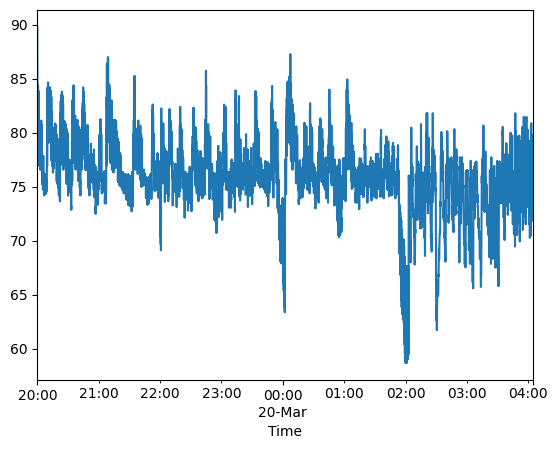

In [22]:
sat = sample_df['global.ce8mde1-01']
sat.plot()

In [23]:
def df_to_supervised(df, window_size=5):
  numpy_df = df.to_numpy()
  X = []
  y = []
  for i in range(len(numpy_df)-window_size):
    row = [[a] for a in numpy_df[i:i+window_size]]
    X.append(row)
    label = numpy_df[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [24]:
WINDOW_SIZE = 5
X1, y1 = df_to_supervised(sat, WINDOW_SIZE)

In [25]:
X1_train, y1_train = X1[:np.floor(.80*len(X1)).astype(int)], y1[:np.floor(.80*len(X1)).astype(int)]
X1_val, y1_val = X1[np.floor(.80*len(X1)).astype(int):np.floor(.90*len(X1)).astype(int)], y1[np.floor(.80*len(X1)).astype(int):np.floor(.90*len(X1)).astype(int)]
X1_test, y1_test = X1[np.floor(.90*len(X1)).astype(int):], y1[np.floor(.90*len(X1)).astype(int):]

## Univariate LSTM (Long Short-Term Memory)

In [ ]:
def get_lstm_model():
  model = Sequential()
  model.add(InputLayer((5, 1)))
  model.add(LSTM(64))
  model.add(Dense(8, 'relu'))
  model.add(Dense(1, 'linear'))
  model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
  return model

In [ ]:
lstm_model = get_lstm_model()
lstm_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_checkpoint = ModelCheckpoint('lstm_model/', save_best_only=True)
lstm_model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=30, batch_size=32, callbacks=[lstm_checkpoint])

Epoch 1/30
145/146 [============================>.] - ETA: 0s - loss: 4721.6333 - root_mean_squared_error: 68.7141

146/146 [==============================] - 12s 62ms/step - loss: 4716.8232 - root_mean_squared_error: 68.6791 - val_loss: 2504.5901 - val_root_mean_squared_error: 50.0459
Epoch 2/30
141/146 [===========================>..] - ETA: 0s - loss: 1588.0095 - root_mean_squared_error: 39.8498

146/146 [==============================] - 6s 44ms/step - loss: 1558.7576 - root_mean_squared_error: 39.4811 - val_loss: 436.8082 - val_root_mean_squared_error: 20.9000
Epoch 3/30
145/146 [============================>.] - ETA: 0s - loss: 212.2946 - root_mean_squared_error: 14.5703

146/146 [==============================] - 7s 47ms/step - loss: 211.8321 - root_mean_squared_error: 14.5545 - val_loss: 17.7388 - val_root_mean_squared_error: 4.2117
Epoch 4/30
146/146 [==============================] - 1s 8ms/step - loss: 16.0327 - root_mean_squared_error: 4.0041 - val_loss: 20.4688 - val_root_mean_squared_error: 4.5242
Epoch 5/30
146/146 [==============================] - 1s 8ms/step - loss: 9.4509 - root_mean_squared_error: 3.0742 - val_loss: 22.4586 - val_root_mean_squared_error: 4.7391
Epoch 6/30
138/146 [===========================>..] - ETA: 0s - loss: 8.0585 - root_mean_squared_error: 2.8387

146/146 [==============================] - 6s 43ms/step - loss: 7.9379 - root_mean_squared_error: 2.8174 - val_loss: 16.1306 - val_root_mean_squared_error: 4.0163
Epoch 7/30
139/146 [===========================>..] - ETA: 0s - loss: 5.5321 - root_mean_squared_error: 2.3520

146/146 [==============================] - 7s 47ms/step - loss: 5.4910 - root_mean_squared_error: 2.3433 - val_loss: 4.2998 - val_root_mean_squared_error: 2.0736
Epoch 8/30
140/146 [===========================>..] - ETA: 0s - loss: 3.7959 - root_mean_squared_error: 1.9483

146/146 [==============================] - 6s 44ms/step - loss: 3.7732 - root_mean_squared_error: 1.9425 - val_loss: 3.4774 - val_root_mean_squared_error: 1.8648
Epoch 9/30
146/146 [==============================] - 1s 6ms/step - loss: 3.3501 - root_mean_squared_error: 1.8303 - val_loss: 4.0384 - val_root_mean_squared_error: 2.0096
Epoch 10/30
142/146 [============================>.] - ETA: 0s - loss: 3.0613 - root_mean_squared_error: 1.7496

146/146 [==============================] - 7s 48ms/step - loss: 3.0710 - root_mean_squared_error: 1.7524 - val_loss: 3.1768 - val_root_mean_squared_error: 1.7824
Epoch 11/30
143/146 [============================>.] - ETA: 0s - loss: 2.8521 - root_mean_squared_error: 1.6888

146/146 [==============================] - 8s 55ms/step - loss: 2.8519 - root_mean_squared_error: 1.6888 - val_loss: 2.5785 - val_root_mean_squared_error: 1.6058
Epoch 12/30
142/146 [============================>.] - ETA: 0s - loss: 2.6968 - root_mean_squared_error: 1.6422

146/146 [==============================] - 8s 56ms/step - loss: 2.6809 - root_mean_squared_error: 1.6373 - val_loss: 2.2859 - val_root_mean_squared_error: 1.5119
Epoch 13/30
146/146 [==============================] - 1s 8ms/step - loss: 2.6435 - root_mean_squared_error: 1.6259 - val_loss: 2.3552 - val_root_mean_squared_error: 1.5347
Epoch 14/30
146/146 [==============================] - 1s 6ms/step - loss: 2.5495 - root_mean_squared_error: 1.5967 - val_loss: 2.5764 - val_root_mean_squared_error: 1.6051
Epoch 15/30
141/146 [===========================>..] - ETA: 0s - loss: 2.5381 - root_mean_squared_error: 1.5931

146/146 [==============================] - 6s 41ms/step - loss: 2.5188 - root_mean_squared_error: 1.5871 - val_loss: 2.2098 - val_root_mean_squared_error: 1.4865
Epoch 16/30
137/146 [===========================>..] - ETA: 0s - loss: 2.4390 - root_mean_squared_error: 1.5617

146/146 [==============================] - 7s 50ms/step - loss: 2.4341 - root_mean_squared_error: 1.5602 - val_loss: 2.1150 - val_root_mean_squared_error: 1.4543
Epoch 17/30
146/146 [==============================] - 1s 6ms/step - loss: 2.3534 - root_mean_squared_error: 1.5341 - val_loss: 2.2949 - val_root_mean_squared_error: 1.5149
Epoch 18/30
146/146 [==============================] - ETA: 0s - loss: 2.3068 - root_mean_squared_error: 1.5188

146/146 [==============================] - 6s 41ms/step - loss: 2.3068 - root_mean_squared_error: 1.5188 - val_loss: 1.9747 - val_root_mean_squared_error: 1.4053
Epoch 19/30
146/146 [==============================] - ETA: 0s - loss: 2.0670 - root_mean_squared_error: 1.4377

146/146 [==============================] - 7s 51ms/step - loss: 2.0670 - root_mean_squared_error: 1.4377 - val_loss: 1.9321 - val_root_mean_squared_error: 1.3900
Epoch 20/30
142/146 [============================>.] - ETA: 0s - loss: 2.0463 - root_mean_squared_error: 1.4305

146/146 [==============================] - 6s 42ms/step - loss: 2.0382 - root_mean_squared_error: 1.4277 - val_loss: 1.7094 - val_root_mean_squared_error: 1.3074
Epoch 21/30
139/146 [===========================>..] - ETA: 0s - loss: 1.8098 - root_mean_squared_error: 1.3453

146/146 [==============================] - 7s 48ms/step - loss: 1.8168 - root_mean_squared_error: 1.3479 - val_loss: 1.6464 - val_root_mean_squared_error: 1.2831
Epoch 22/30
146/146 [==============================] - 1s 9ms/step - loss: 1.7302 - root_mean_squared_error: 1.3154 - val_loss: 1.7971 - val_root_mean_squared_error: 1.3406
Epoch 23/30
141/146 [===========================>..] - ETA: 0s - loss: 1.6038 - root_mean_squared_error: 1.2664

146/146 [==============================] - 6s 41ms/step - loss: 1.6030 - root_mean_squared_error: 1.2661 - val_loss: 1.4544 - val_root_mean_squared_error: 1.2060
Epoch 24/30
146/146 [==============================] - 1s 6ms/step - loss: 1.4881 - root_mean_squared_error: 1.2199 - val_loss: 2.2863 - val_root_mean_squared_error: 1.5120
Epoch 25/30
146/146 [==============================] - 1s 6ms/step - loss: 1.5211 - root_mean_squared_error: 1.2333 - val_loss: 1.7932 - val_root_mean_squared_error: 1.3391
Epoch 26/30
146/146 [==============================] - 1s 6ms/step - loss: 1.5584 - root_mean_squared_error: 1.2484 - val_loss: 1.7647 - val_root_mean_squared_error: 1.3284
Epoch 27/30
146/146 [==============================] - 1s 6ms/step - loss: 1.4601 - root_mean_squared_error: 1.2083 - val_loss: 1.4890 - val_root_mean_squared_error: 1.2203
Epoch 28/30
146/146 [==============================] - 1s 6ms/step - loss: 1.4264 - root_mean_squared_error: 1.1943 - val_loss: 1.5762 - val_root_

In [ ]:
lstm_model = load_model('lstm_model/')

In [ ]:
train_predictions = lstm_model.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results

146/146 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,79.640480,79.376909
1,80.602562,83.855121
2,79.875565,80.243575
3,81.184196,84.388454
4,80.363892,79.910242
...,...,...
4647,77.089897,78.400000
4648,77.928009,76.666667
4649,77.006508,76.600000
4650,75.966576,75.533333


MSE for Univariate LSTM model (train): 1.6243639770426974


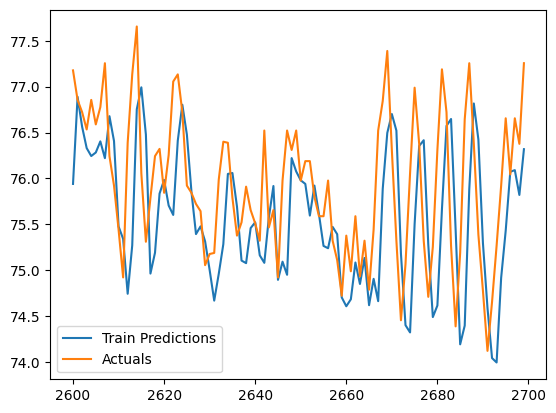

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][2600:2700])
plt.plot(train_results['Actuals'][2600:2700])
plt.legend(['Train Predictions', 'Actuals'])
print('MSE for Univariate LSTM model (train):', mse(train_results['Actuals'],train_results['Train Predictions']))
plt.show()

In [ ]:
val_predictions = lstm_model.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results

19/19 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,75.317024,76.266667
1,76.152534,76.733333
2,76.065674,75.933333
3,76.053375,75.533333
4,75.166847,75.466667
...,...,...
576,77.662834,80.666667
577,79.463005,78.000000
578,78.606697,74.466667
579,75.392006,73.200000


MSE for Univariate LSTM model (validation): 1.4543903693813445


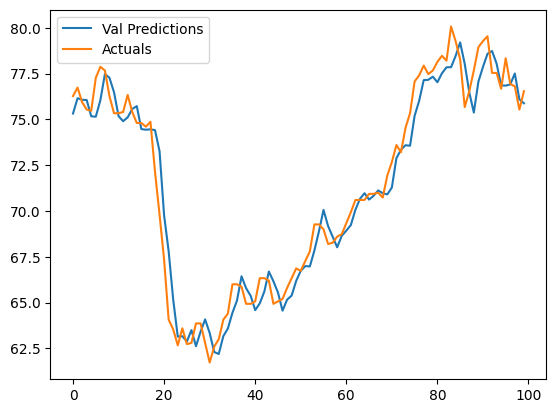

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(['Val Predictions', 'Actuals'])
print('MSE for Univariate LSTM model (validation):', mse(val_results['Actuals'],val_results['Val Predictions']))
plt.show()

In [ ]:
test_predictions = lstm_model.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

19/19 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,72.610695,76.400000
1,74.463203,75.733333
2,76.750145,75.733333
3,74.983658,73.800000
4,74.491478,74.333333
...,...,...
577,74.551842,75.400000
578,75.585869,76.800000
579,75.641220,75.066667
580,75.887413,74.533333


MSE for Univariate LSTM model (test): 3.2501824251830467


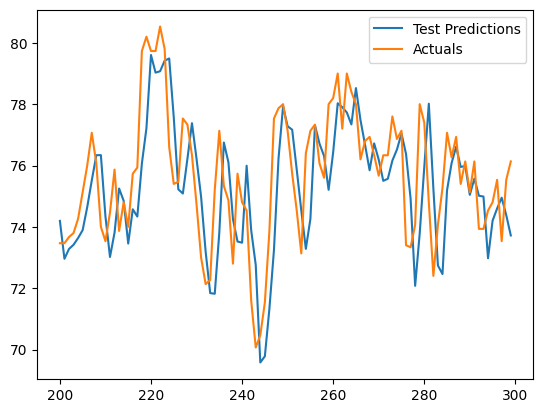

In [ ]:
plt.plot(test_results['Test Predictions'][200:300])
plt.plot(test_results['Actuals'][200:300])
plt.legend(['Test Predictions', 'Actuals'])
print('MSE for Univariate LSTM model (test):', mse(test_results['Actuals'],test_results['Test Predictions']))
plt.show()

##Univariate CNN (Convolutional Neural Network)

In [ ]:
def get_cnn_model():
  model = Sequential()
  model.add(InputLayer((5, 1)))
  model.add(Conv1D(64, kernel_size=2))
  model.add(Flatten())
  model.add(Dense(8, 'relu'))
  model.add(Dense(1, 'linear'))
  model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
  return model

In [ ]:
cnn_model = get_cnn_model()
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 8)                 2056      
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_checkpoint = ModelCheckpoint('cnn_model/', save_best_only=True)
cnn_model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=20, batch_size=32, callbacks=[cnn_checkpoint])

Epoch 1/20
128/146 [=========================>....] - ETA: 0s - loss: 1148.4678 - root_mean_squared_error: 33.8890

146/146 [==============================] - 2s 10ms/step - loss: 1014.2787 - root_mean_squared_error: 31.8477 - val_loss: 14.4334 - val_root_mean_squared_error: 3.7991
Epoch 2/20
126/146 [========================>.....] - ETA: 0s - loss: 4.3756 - root_mean_squared_error: 2.0918

146/146 [==============================] - 1s 9ms/step - loss: 4.1544 - root_mean_squared_error: 2.0382 - val_loss: 3.3176 - val_root_mean_squared_error: 1.8214
Epoch 3/20
146/146 [==============================] - ETA: 0s - loss: 2.9790 - root_mean_squared_error: 1.7260

146/146 [==============================] - 2s 12ms/step - loss: 2.9790 - root_mean_squared_error: 1.7260 - val_loss: 3.3165 - val_root_mean_squared_error: 1.8211
Epoch 4/20
145/146 [============================>.] - ETA: 0s - loss: 2.9731 - root_mean_squared_error: 1.7243

146/146 [==============================] - 2s 12ms/step - loss: 2.9704 - root_mean_squared_error: 1.7235 - val_loss: 3.3156 - val_root_mean_squared_error: 1.8209
Epoch 5/20
143/146 [============================>.] - ETA: 0s - loss: 2.9648 - root_mean_squared_error: 1.7219

146/146 [==============================] - 1s 10ms/step - loss: 2.9607 - root_mean_squared_error: 1.7207 - val_loss: 3.3112 - val_root_mean_squared_error: 1.8197
Epoch 6/20
146/146 [==============================] - 0s 2ms/step - loss: 2.9464 - root_mean_squared_error: 1.7165 - val_loss: 3.3235 - val_root_mean_squared_error: 1.8230
Epoch 7/20
145/146 [============================>.] - ETA: 0s - loss: 2.9431 - root_mean_squared_error: 1.7155

146/146 [==============================] - 1s 9ms/step - loss: 2.9402 - root_mean_squared_error: 1.7147 - val_loss: 3.3067 - val_root_mean_squared_error: 1.8184
Epoch 8/20
126/146 [========================>.....] - ETA: 0s - loss: 2.9179 - root_mean_squared_error: 1.7082

146/146 [==============================] - 1s 9ms/step - loss: 2.9216 - root_mean_squared_error: 1.7093 - val_loss: 3.3043 - val_root_mean_squared_error: 1.8178
Epoch 9/20
146/146 [==============================] - 0s 2ms/step - loss: 2.9050 - root_mean_squared_error: 1.7044 - val_loss: 3.3051 - val_root_mean_squared_error: 1.8180
Epoch 10/20
144/146 [============================>.] - ETA: 0s - loss: 2.8886 - root_mean_squared_error: 1.6996

146/146 [==============================] - 2s 15ms/step - loss: 2.8861 - root_mean_squared_error: 1.6988 - val_loss: 3.2980 - val_root_mean_squared_error: 1.8160
Epoch 11/20
139/146 [===========================>..] - ETA: 0s - loss: 2.8919 - root_mean_squared_error: 1.7006

146/146 [==============================] - 1s 9ms/step - loss: 2.8680 - root_mean_squared_error: 1.6935 - val_loss: 3.2939 - val_root_mean_squared_error: 1.8149
Epoch 12/20
146/146 [==============================] - 0s 2ms/step - loss: 2.8443 - root_mean_squared_error: 1.6865 - val_loss: 3.3005 - val_root_mean_squared_error: 1.8167
Epoch 13/20
140/146 [===========================>..] - ETA: 0s - loss: 2.8450 - root_mean_squared_error: 1.6867

146/146 [==============================] - 1s 9ms/step - loss: 2.8219 - root_mean_squared_error: 1.6799 - val_loss: 3.2888 - val_root_mean_squared_error: 1.8135
Epoch 14/20
126/146 [========================>.....] - ETA: 0s - loss: 2.8331 - root_mean_squared_error: 1.6832

146/146 [==============================] - 2s 11ms/step - loss: 2.8026 - root_mean_squared_error: 1.6741 - val_loss: 3.2799 - val_root_mean_squared_error: 1.8111
Epoch 15/20
146/146 [==============================] - 0s 3ms/step - loss: 2.7853 - root_mean_squared_error: 1.6689 - val_loss: 3.2828 - val_root_mean_squared_error: 1.8119
Epoch 16/20
137/146 [===========================>..] - ETA: 0s - loss: 2.7549 - root_mean_squared_error: 1.6598

146/146 [==============================] - 2s 13ms/step - loss: 2.7531 - root_mean_squared_error: 1.6592 - val_loss: 3.2690 - val_root_mean_squared_error: 1.8080
Epoch 17/20
143/146 [============================>.] - ETA: 0s - loss: 2.7206 - root_mean_squared_error: 1.6494

146/146 [==============================] - 2s 11ms/step - loss: 2.7253 - root_mean_squared_error: 1.6508 - val_loss: 3.2631 - val_root_mean_squared_error: 1.8064
Epoch 18/20
146/146 [==============================] - 0s 2ms/step - loss: 2.6948 - root_mean_squared_error: 1.6416 - val_loss: 3.2675 - val_root_mean_squared_error: 1.8076
Epoch 19/20
121/146 [=======================>......] - ETA: 0s - loss: 2.6843 - root_mean_squared_error: 1.6384

146/146 [==============================] - 1s 9ms/step - loss: 2.6659 - root_mean_squared_error: 1.6328 - val_loss: 3.2567 - val_root_mean_squared_error: 1.8046
Epoch 20/20
146/146 [==============================] - 0s 3ms/step - loss: 2.6356 - root_mean_squared_error: 1.6235 - val_loss: 3.2608 - val_root_mean_squared_error: 1.8058


In [ ]:
cnn_model = load_model('cnn_model/')

In [ ]:
train_predictions = cnn_model.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results

146/146 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,83.087265,79.376909
1,81.903671,83.855121
2,81.346008,80.243575
3,81.565704,84.388454
4,81.755562,79.910242
...,...,...
4647,76.093323,78.400000
4648,76.898697,76.666667
4649,77.342743,76.600000
4650,77.326935,75.533333


MSE for Univariate CNN model (train): 2.6474732246853003


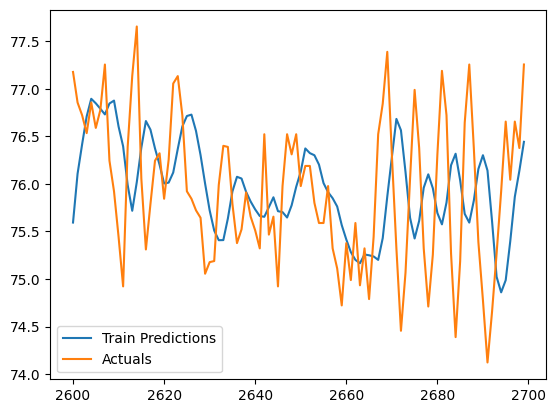

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][2600:2700])
plt.plot(train_results['Actuals'][2600:2700])
plt.legend(['Train Predictions', 'Actuals'])
print('MSE for Univariate CNN model (train):', mse(train_results['Actuals'],train_results['Train Predictions']))
plt.show()

In [ ]:
val_predictions = cnn_model.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results

19/19 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,76.608871,76.266667
1,76.335495,76.733333
2,76.292740,75.933333
3,76.293076,75.533333
4,76.200981,75.466667
...,...,...
576,75.368797,80.666667
577,76.593666,78.000000
578,77.785393,74.466667
579,77.927765,73.200000


MSE for Univariate CNN model (validation): 3.256722051317531


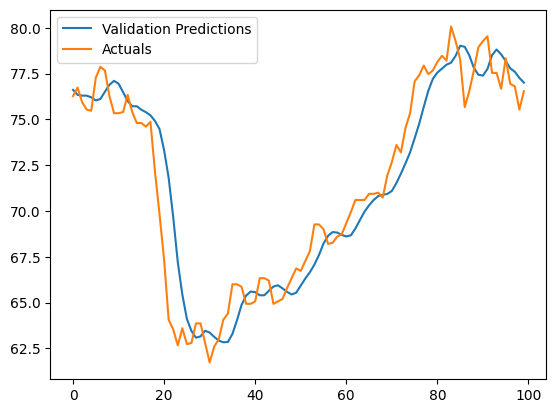

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(['Validation Predictions', 'Actuals'])
print('MSE for Univariate CNN model (validation):', mse(val_results['Actuals'],val_results['Val Predictions']))
plt.show()

In [ ]:
test_predictions = cnn_model.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

19/19 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,75.717026,76.400000
1,74.700264,75.733333
2,74.742325,75.733333
3,74.871277,73.800000
4,75.170364,74.333333
...,...,...
577,77.511696,75.400000
578,77.120842,76.800000
579,76.370010,75.066667
580,75.877609,74.533333


MSE for Univariate CNN model (test): 5.577810724519063


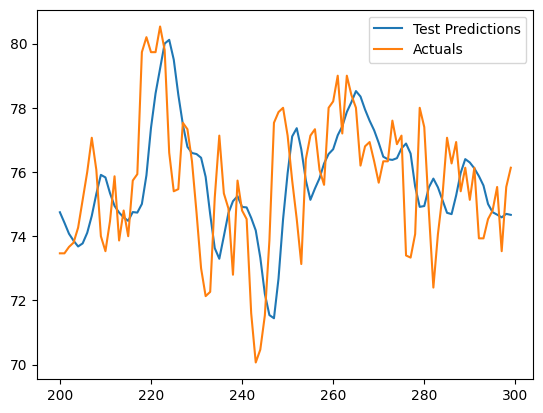

In [ ]:
plt.plot(test_results['Test Predictions'][200:300])
plt.plot(test_results['Actuals'][200:300])
plt.legend(['Test Predictions', 'Actuals'])
print('MSE for Univariate CNN model (test):', mse(test_results['Actuals'],test_results['Test Predictions']))
plt.show()

##Univariate GRU (Gated Recurrent Unit)

In [ ]:
def get_gru_model():
  model = Sequential()
  model.add(InputLayer((5, 1)))
  model.add(GRU(64))
  model.add(Dense(8, 'relu'))
  model.add(Dense(1, 'linear'))
  model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.002), metrics=[RootMeanSquaredError()])
  return model

In [ ]:
gru_model = get_gru_model()
gru_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 64)                12864     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_checkpoint = ModelCheckpoint('gru_model/', save_best_only=True)
gru_model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=20, batch_size=32, callbacks=[gru_checkpoint])

Epoch 1/20
137/146 [===========================>..] - ETA: 0s - loss: 3868.7825 - root_mean_squared_error: 62.1995

146/146 [==============================] - 10s 42ms/step - loss: 3718.7520 - root_mean_squared_error: 60.9816 - val_loss: 923.8239 - val_root_mean_squared_error: 30.3945
Epoch 2/20
143/146 [============================>.] - ETA: 0s - loss: 247.0237 - root_mean_squared_error: 15.7170

146/146 [==============================] - 7s 46ms/step - loss: 243.1439 - root_mean_squared_error: 15.5931 - val_loss: 19.5443 - val_root_mean_squared_error: 4.4209
Epoch 3/20
146/146 [==============================] - 1s 8ms/step - loss: 9.4343 - root_mean_squared_error: 3.0715 - val_loss: 24.1568 - val_root_mean_squared_error: 4.9150
Epoch 4/20
141/146 [===========================>..] - ETA: 0s - loss: 8.8361 - root_mean_squared_error: 2.9726

146/146 [==============================] - 6s 38ms/step - loss: 8.8378 - root_mean_squared_error: 2.9728 - val_loss: 13.3038 - val_root_mean_squared_error: 3.6474
Epoch 5/20
139/146 [===========================>..] - ETA: 0s - loss: 5.3253 - root_mean_squared_error: 2.3077

146/146 [==============================] - 6s 44ms/step - loss: 5.2884 - root_mean_squared_error: 2.2997 - val_loss: 9.2385 - val_root_mean_squared_error: 3.0395
Epoch 6/20
140/146 [===========================>..] - ETA: 0s - loss: 4.8373 - root_mean_squared_error: 2.1994

146/146 [==============================] - 6s 44ms/step - loss: 4.8637 - root_mean_squared_error: 2.2054 - val_loss: 4.3943 - val_root_mean_squared_error: 2.0963
Epoch 7/20
146/146 [==============================] - 1s 6ms/step - loss: 3.9732 - root_mean_squared_error: 1.9933 - val_loss: 5.3033 - val_root_mean_squared_error: 2.3029
Epoch 8/20
140/146 [===========================>..] - ETA: 0s - loss: 3.2268 - root_mean_squared_error: 1.7963

146/146 [==============================] - 13s 90ms/step - loss: 3.2109 - root_mean_squared_error: 1.7919 - val_loss: 2.5829 - val_root_mean_squared_error: 1.6072
Epoch 9/20
144/146 [============================>.] - ETA: 0s - loss: 2.8891 - root_mean_squared_error: 1.6997

146/146 [==============================] - 6s 42ms/step - loss: 2.8835 - root_mean_squared_error: 1.6981 - val_loss: 2.0397 - val_root_mean_squared_error: 1.4282
Epoch 10/20
141/146 [===========================>..] - ETA: 0s - loss: 2.7955 - root_mean_squared_error: 1.6720

146/146 [==============================] - 6s 45ms/step - loss: 2.7974 - root_mean_squared_error: 1.6726 - val_loss: 1.9493 - val_root_mean_squared_error: 1.3962
Epoch 11/20
146/146 [==============================] - 1s 6ms/step - loss: 2.9541 - root_mean_squared_error: 1.7187 - val_loss: 2.5891 - val_root_mean_squared_error: 1.6091
Epoch 12/20
146/146 [==============================] - 1s 6ms/step - loss: 2.7806 - root_mean_squared_error: 1.6675 - val_loss: 2.3656 - val_root_mean_squared_error: 1.5381
Epoch 13/20
146/146 [==============================] - 1s 6ms/step - loss: 2.7523 - root_mean_squared_error: 1.6590 - val_loss: 4.5243 - val_root_mean_squared_error: 2.1270
Epoch 14/20
146/146 [==============================] - 1s 6ms/step - loss: 2.7464 - root_mean_squared_error: 1.6572 - val_loss: 3.3548 - val_root_mean_squared_error: 1.8316
Epoch 15/20
146/146 [==============================] - 1s 6ms/step - loss: 2.6390 - root_mean_squared_error: 1.6245 - val_loss: 2.1417 - val_root_

146/146 [==============================] - 7s 48ms/step - loss: 2.5932 - root_mean_squared_error: 1.6104 - val_loss: 1.6874 - val_root_mean_squared_error: 1.2990
Epoch 18/20
138/146 [===========================>..] - ETA: 0s - loss: 2.4017 - root_mean_squared_error: 1.5498

146/146 [==============================] - 6s 39ms/step - loss: 2.4076 - root_mean_squared_error: 1.5516 - val_loss: 1.6713 - val_root_mean_squared_error: 1.2928
Epoch 19/20
146/146 [==============================] - ETA: 0s - loss: 2.2638 - root_mean_squared_error: 1.5046

146/146 [==============================] - 7s 47ms/step - loss: 2.2638 - root_mean_squared_error: 1.5046 - val_loss: 1.6222 - val_root_mean_squared_error: 1.2736
Epoch 20/20
146/146 [==============================] - 1s 8ms/step - loss: 2.0501 - root_mean_squared_error: 1.4318 - val_loss: 1.8813 - val_root_mean_squared_error: 1.3716


In [ ]:
gru_model = load_model('gru_model/')

In [ ]:
train_predictions = gru_model.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1_train})
train_results

146/146 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,79.944176,79.376909
1,80.639397,83.855121
2,80.454178,80.243575
3,80.852455,84.388454
4,80.847183,79.910242
...,...,...
4647,77.839340,78.400000
4648,78.438133,76.666667
4649,77.346069,76.600000
4650,76.668144,75.533333


MSE for Univariate GRU model (train): 1.9277707653905836


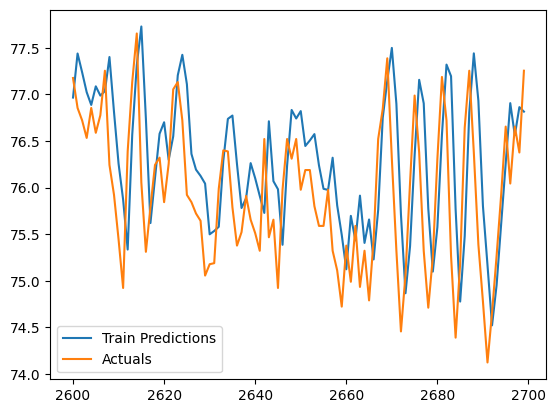

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][2600:2700])
plt.plot(train_results['Actuals'][2600:2700])
plt.legend(['Train Predictions', 'Actuals'])
print('MSE for Univariate GRU model (train):', mse(train_results['Actuals'],train_results['Train Predictions']))
plt.show()

In [ ]:
val_predictions = gru_model.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y1_val})
val_results

19/19 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,76.502426,76.266667
1,76.673813,76.733333
2,76.981087,75.933333
3,76.462029,75.533333
4,75.919289,75.466667
...,...,...
576,78.082115,80.666667
577,79.951103,78.000000
578,79.203484,74.466667
579,74.411186,73.200000


MSE for Univariate GRU model (validation): 1.6221717047944566


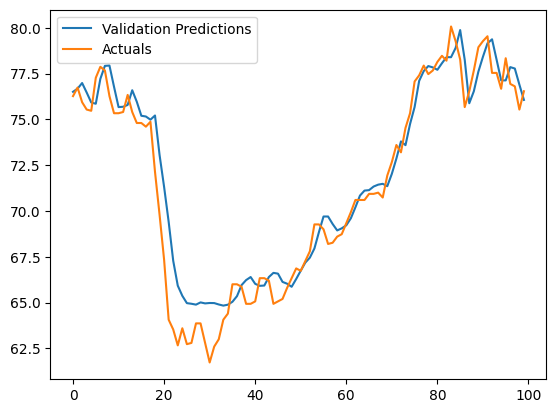

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.legend(['Validation Predictions', 'Actuals'])
print('MSE for Univariate GRU model (validation):', mse(val_results['Actuals'],val_results['Val Predictions']))
plt.show()

In [ ]:
test_predictions = gru_model.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y1_test})
test_results

19/19 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,73.263107,76.400000
1,76.395737,75.733333
2,76.412941,75.733333
3,76.101578,73.800000
4,74.381416,74.333333
...,...,...
577,75.326973,75.400000
578,75.833984,76.800000
579,76.912674,75.066667
580,75.771233,74.533333


MSE for Univariate GRU model (test): 2.860045507647697


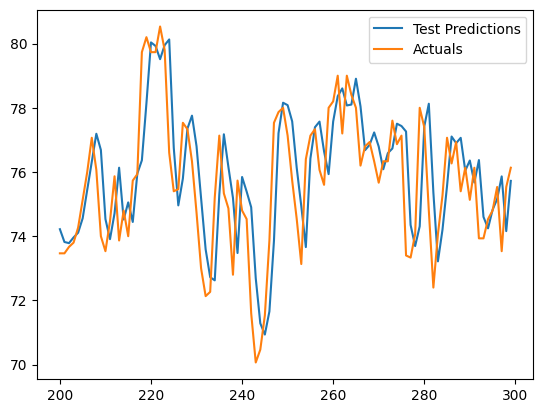

In [ ]:
plt.plot(test_results['Test Predictions'][200:300])
plt.plot(test_results['Actuals'][200:300])
plt.legend(['Test Predictions', 'Actuals'])
print('MSE for Univariate GRU model (test):', mse(test_results['Actuals'],test_results['Test Predictions']))
plt.show()